In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
gammas = [0.3, 0.6, 0.8]
sigmas = [0.5, 0.6, 0.3]
iterations = np.arange(20, 2000, 10)
ans = []

def calc_interval_a(gamma, sigma):
    for it in iterations:
        x = np.random.normal(0, sigma, it)
        fst = stats.chi2.ppf((1 - gamma) / 2, it)
        snd = stats.chi2.ppf((1 + gamma) / 2, it)
        sum_x = np.sum(x ** 2)
        ans.append(sum_x / fst - sum_x / snd)


def calc_interval_b(gamma, sigma):
    for it in iterations:
        xs = np.random.normal(0, sigma, it)
        fst = stats.norm.ppf((3 - gamma) / 4)
        snd = stats.norm.ppf((3 + gamma) / 4)
        sum_x = it * np.mean(xs) ** 2
        ans.append(sum_x / fst ** 2 - sum_x / snd ** 2)


def plot_a():
    for (gamma, sigma) in zip(gammas, sigmas):
        ans.clear()
        calc_interval_a(gamma, sigma)
        plt.plot(iterations, ans)
        plt.title('stat A, gamma = ' + str(gamma) + ', sigma = ' + str(sigma))
        plt.draw()
        plt.show()
        # ans.clear()


def plot_b():
    for (gamma, sigma) in zip(gammas, sigmas):
        ans.clear()
        calc_interval_b(gamma, sigma)
        plt.plot(iterations, ans)
        plt.title('stat B, gamma = ' + str(gamma) + ', sigma = ' + str(sigma))
        plt.draw()
        plt.show()

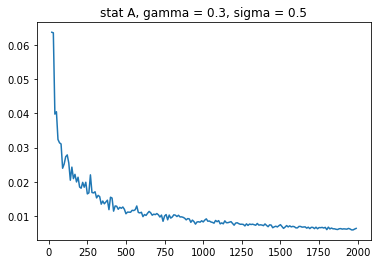

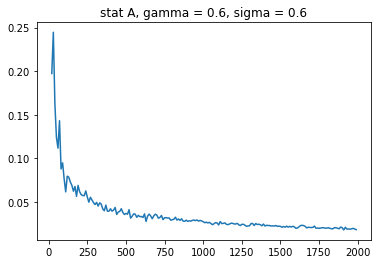

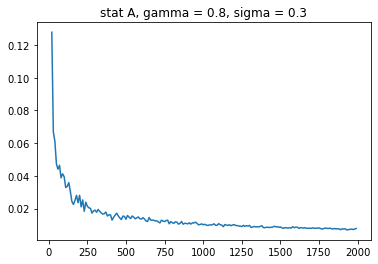

In [3]:
plot_a()

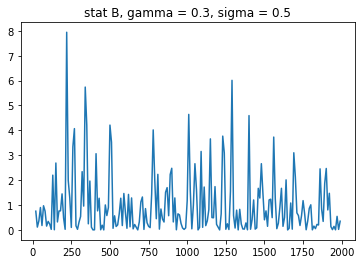

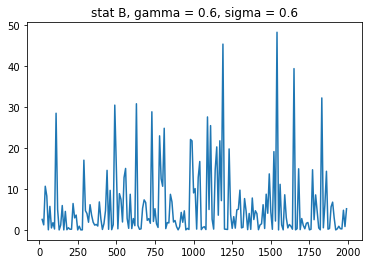

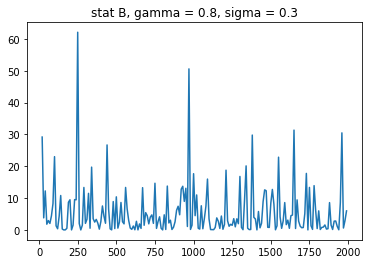

In [4]:
plot_b()

**Вывод:**

Длина доверительного интервала при увеличении объема выборки довольно быстро уменьшается при построении способом А.
А при использовании способа Б никакой корреляции не видно, происходят страшные скачки и сами значения тоже неясно, как интерпретировать.

Так что, очевидно, для реального использования больше походит способ А.